In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import size_contrast_opto_analysis as scoa
reload(scoa)
import retinotopy_analysis as rt
reload(rt)
import naka_rushton_analysis as nra
import pdb
import size_contrast_analysis as sca
import skimage.segmentation as sks
import skimage.morphology as skm
import sklearn

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
ds = sio.loadmat('/home/mossing/Documents/notebooks/size_contrast/pyr_l23_data_struct.mat',squeeze_me=True) #,struct_as_record=True)

In [3]:
keylist = [x for x in list(ds.keys()) if not x[0]=='_']

In [5]:
# R = np.zeros((5,4,227))
# k = 1
# for s in range(5):
#     pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
#     dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
#     ontarget_ret_lax = np.logical_and(dist_ret<30,pval_ret<0.01)
#     size = ds[keylist[k]]['stimulus_id'][()][0]
#     contrast = ds[keylist[k]]['stimulus_id'][()][1]
#     running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
#     lkat = np.logical_and(np.logical_and(contrast>0,size==s),running_speed_cm_s>7)
#     X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
#     angle = ds[keylist[k]]['stimulus_id'][()][-1][lkat]
#     uangle = np.unique(angle)
#     y = np.zeros((len(angle),len(uangle)))
#     for i in range(y.shape[1]):
#         y[:,i] = angle==i
#     y = np.logical_or(y[:,:4],y[:,4:])

#     na = 40
#     sc = np.zeros((na,))
#     alphas = np.linspace(1e-3,1e-2,na)
#     for ia,alpha in enumerate(alphas):
#         linreg = sklearn.linear_model.Lasso(alpha=alpha)
#         reg = linreg.fit(X,y)
#         scores = sklearn.model_selection.cross_validate(linreg,X,y)
#         pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
#         sc[ia] = scores['test_score'].mean()
#     best_alpha = np.argmax(sc)
#     linreg = sklearn.linear_model.Lasso(alpha=alphas[best_alpha])
#     reg = linreg.fit(X,y)

#     R[s] = reg.coef_

In [4]:
for k in range(len(keylist)):
    nangle = 8
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    print(ontarget_ret_lax.sum())

191
350
230
76
346
690
792
654
179
645


/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [5]:
for k in range(len(keylist)):
    print(np.nanmean(ds[keylist[k]]['running_speed_cm_s'][()]))

6.084509319392928
50.38742529920508
23.595653946537727
2.3312646414078433
49.607487018749104
2.002650377424303
2.6860671499535638
35.956931910660785
22.16879188679018
5.510929019214938


/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


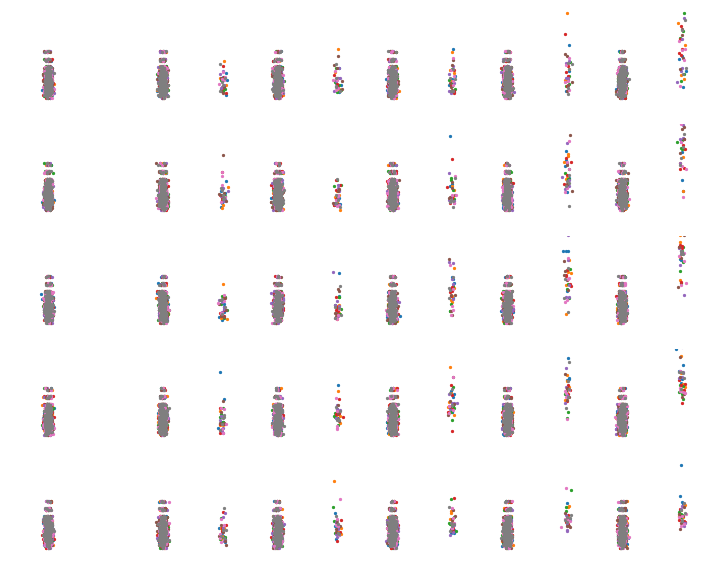

In [13]:
# Here, we plot the distribution of average responses to zero-contrast vs. non-zero contrast stimuli, 
# for all the on-target neurons in a particular mouse
k = 1
plt.figure(figsize=(12,10))
nsize = 5
ncontrast = 6
nangle = 8
size = ds[keylist[k]]['stimulus_id'][()][0]
contrast = ds[keylist[k]]['stimulus_id'][()][1]
running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
angle = ds[keylist[k]]['stimulus_id'][()][-1]
pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
for s in range(nsize):
    for c in range(ncontrast):
        plt.subplot(nsize,ncontrast,s*ncontrast+c+1)
        all_or_nothing = np.logical_or(contrast==0,contrast==c)
        for i in range(nangle): #(nangle):
            stim_of_interest = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running_speed_cm_s>7),all_or_nothing)
            X = ds[keylist[k]]['decon'][()].T[stim_of_interest][:,ontarget_ret_lax]
            nonzero_stim = contrast[stim_of_interest]>0
            avg_across_rois = X.mean(1)
            plt.scatter(nonzero_stim+0.03*np.random.randn(nonzero_stim.size),avg_across_rois,s=5)
            plt.ylim((0,0.3))
            plt.xlim((-0.3,1.3))
            plt.axis('off')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


KeyboardInterrupt: 

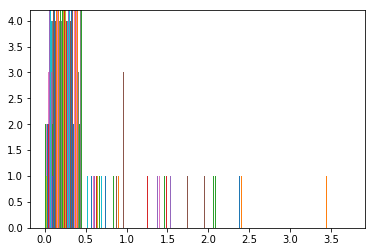

In [14]:
for k in range(len(keylist)):
    nangle = 8
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    if ontarget_ret_lax.sum()>100:
        R = np.zeros((5,8,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        all_or_nothing = np.logical_or(contrast==0,contrast>3)

        plt.figure()
        for s in range(5):
            for i in range(nangle):
                lkat = np.logical_and(np.logical_and(np.logical_and(angle==i,size==s),running_speed_cm_s>7),all_or_nothing)
                X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
                y = contrast[lkat]>1
                plt.hist(X[y==0])
                plt.hist(X[y==1])
        #         angle = ds[keylist[k]]['stimulus_id'][()][-1][lkat]

In [ ]:
nkey = len(keylist)
R = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        R[k] = np.zeros((5,8,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        all_or_nothing = np.logical_or(contrast==0,contrast>3)

        plt.figure(figsize=(10,2))
        for s in range(5):
            plt.subplot(1,5,s+1)
            for i in range(nangle):

                lkat = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running),all_or_nothing)
                X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
        #         angle = ds[keylist[k]]['stimulus_id'][()][-1][lkat]
                uangle = np.unique(angle)
                y = np.zeros((len(angle[lkat]),))
                y = contrast[lkat]>0
        #         y = np.logical_or(y[:,:4],y[:,4:])

                na = 50
                sc = np.zeros((na,))
                alphas = np.logspace(0,3,na)
                for ia,alpha in enumerate(alphas):
                    linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                    reg = linreg.fit(X,y)
                    scores = sklearn.model_selection.cross_validate(linreg,X,y)
                    pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                    sc[ia] = scores['test_score'].mean()
                best_alpha = np.argmax(sc)
                linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                reg = linreg.fit(X,y)

                R[k][s,i] = reg.coef_
                plt.plot(sc)
                plt.ylim(-1,1)

In [ ]:
def dot_product(v1,v2):
    return (v1*v2).sum()/np.sqrt((v1**2).sum())/np.sqrt((v2**2).sum())
dp = np.ones((nkey,nsize,nangle,nangle))*np.nan
for k in range(nkey):
    if not R[k] is None:
        for s in range(5):
            for i in range(nangle):
                for j in range(nangle):
                    dp[k,s,i,j] = dot_product(R[k][s,i],R[k][s,j])

In [ ]:
plt.figure()
for s in range(5):
    plt.subplot(1,nsize,s+1)
    plt.imshow(np.nanmean(dp[:,s],0),vmin=0,vmax=1)
    plt.axis('off')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


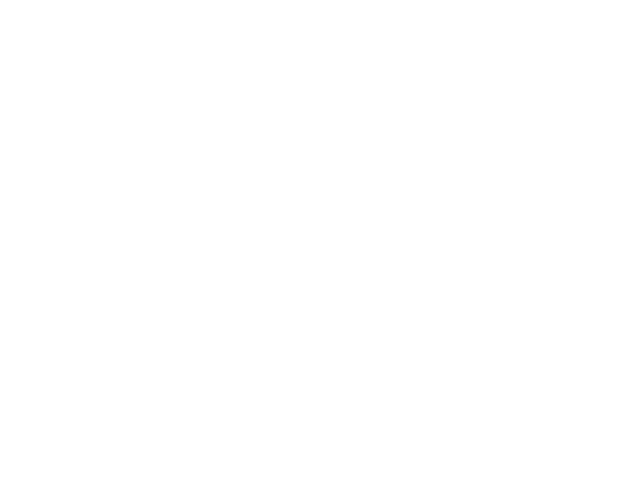

(0, 1)

In [129]:
dpm = np.nanmean(dp,0)
for i in range(dpm.shape[1]):
    dpm[:,i] = np.roll(dpm[:,i],-i,axis=-1)
plt.figure()
for s in range(5):
    plt.plot(dpm[s].mean(0))
plt.ylim((0,1))

In [133]:
nkey = len(keylist)
Rnaive = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        Rnaive[k] = np.zeros((5,8,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        all_or_nothing = np.logical_or(contrast==0,contrast>3)

        for s in range(5):
            for i in range(nangle):

                lkat = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running),all_or_nothing)
                X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
                uangle = np.unique(angle)
                y = np.zeros((len(angle[lkat]),))
                y = contrast[lkat]>0

                Rnaive[k][s,i] = X[y==1].mean(0) - X[y==0].mean(0)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


In [134]:
dpnaive = np.ones((nkey,nsize,nangle,nangle))*np.nan
for k in range(nkey):
    if not Rnaive[k] is None:
        for s in range(5):
            for i in range(nangle):
                for j in range(nangle):
                    dpnaive[k,s,i,j] = dot_product(Rnaive[k][s,i],Rnaive[k][s,j])

<IPython.core.display.Javascript object>


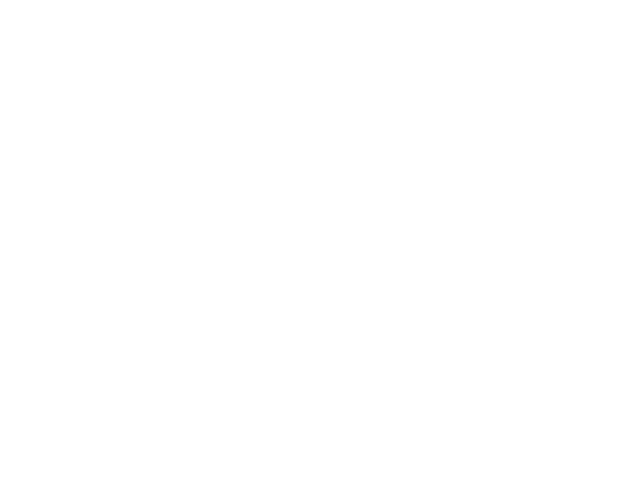

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'orientation 2 ($^o$)')

In [203]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

usize = [5,8,13,22,36]
plt.figure()
for s in range(5):
    plt.subplot(1,5,s+1)
    plt.imshow(np.nanmean(dpnaive,0)[s],vmin=0,vmax=1,extent=[0,360,0,360])
    plt.axis('off')
    plt.title(str(int(np.round(usize[s])))+'$^o$')
#     plt.colorbar()
    ax = plt.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.axis('off')

plt.axis('on')
cbar = plt.colorbar(cax=cax)
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('pop. FR corr.', rotation=270)
plt.subplot(1,5,1)
plt.axis('on')
plt.xticks([0,180])
plt.yticks([0,180])
plt.xlabel('orientation 1 ($^o$)')
plt.ylabel('orientation 2 ($^o$)')
# plt.savefig('pop_fr_corr.pdf')

In [196]:
nkey = len(keylist)
Rcontrast_ori = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        Rcontrast_ori[k] = np.zeros((nsize,nangle,ncontrast-1,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        

        for s in range(nsize):
            for i in range(nangle):
                for c in range(ncontrast-1):
                    all_or_nothing = np.logical_or(contrast==0,contrast==c+1)
                    lkat = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running),all_or_nothing)
                    X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
                    y = np.logical_and(contrast[lkat]==c+1,angle[lkat]==i)
                    Rcontrast_ori[k][s,i,c] = X[y==1].mean(0) - X[y==0].mean(0)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


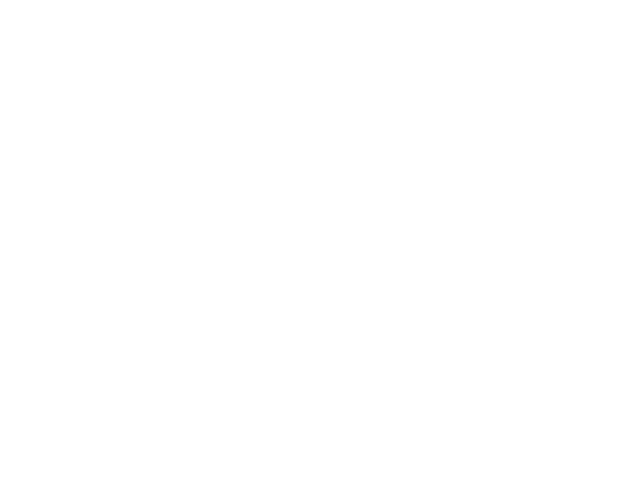

In [205]:
dpcontrast_ori = np.ones((nkey,nsize,ncontrast-1,nangle,nangle))*np.nan
for k in range(nkey):
    if not Rcontrast[k] is None:
        for s in range(5):
            for c in range(ncontrast-1):
                for i1 in range(nangle):
                    for i2 in range(nangle):
                        dpcontrast_ori[k,s,c,i1,i2] = dot_product(Rcontrast_ori[k][s,i1,c],Rcontrast_ori[k][s,i2,c])
plt.figure()
for s in range(nsize):
    for c in range(ncontrast-1):
        plt.subplot(nsize,ncontrast-1,s*(ncontrast-1)+c+1)
        plt.imshow(np.nanmean(dpcontrast_ori[:,s,c],0),vmin=0,vmax=1)
        plt.axis('off')

In [194]:
nkey = len(keylist)
Rcontrast = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        Rcontrast[k] = np.zeros((nsize,nangle,ncontrast-1,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        

        for s in range(nsize):
            for i in range(nangle):
                for c in range(ncontrast-1):
                    all_or_nothing = np.logical_or(contrast==0,contrast==c+1)
                    lkat = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,size==s),contrast==0),running),all_or_nothing)
                    X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
                    uangle = np.unique(angle)
                    y = np.zeros((len(angle[lkat]),))
                    y = contrast[lkat]==c+1

                    Rcontrast[k][s,i,c] = X[y==1].mean(0) - X[y==0].mean(0)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


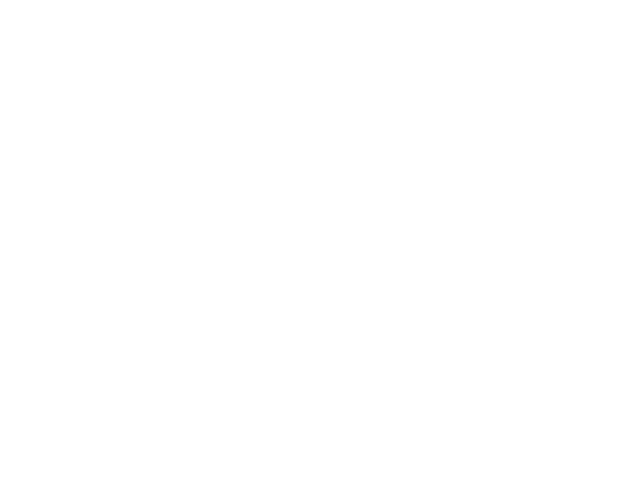

In [184]:
dpcontrast = np.ones((nkey,nsize,nangle,ncontrast-1,ncontrast-1))*np.nan
for k in range(nkey):
    if not Rcontrast[k] is None:
        for s in range(5):
            for i in range(nangle):
                for c1 in range(ncontrast-1):
                    for c2 in range(ncontrast-1):
                        dpcontrast[k,s,i,c1,c2] = dot_product(Rcontrast[k][s,i,c1],Rcontrast[k][s,i,c2])
plt.figure()
for s in range(nsize):
    plt.subplot(1,nsize,s+1)
    plt.imshow(np.nanmean(np.nanmean(dpcontrast[:,s],0),0))

In [147]:
nkey = len(keylist)
Rsize = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        Rsize[k] = np.zeros((nsize,nangle,ncontrast-1,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        for s in range(nsize):
            for i in range(nangle):
                for c in range(ncontrast-1):
                    all_or_nothing = np.logical_or(contrast==0,np.logical_and(contrast==c+1,size==s))
                    lkat = np.logical_and(np.logical_and(np.logical_or(np.logical_and(angle==i,contrast==c+1),contrast==0),running),all_or_nothing)
                    X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
                    uangle = np.unique(angle)
                    y = np.zeros((len(angle[lkat]),))
                    y = size[lkat]==s

                    Rsize[k][s,i,c] = X[y==1].mean(0) - X[y==0].mean(0)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


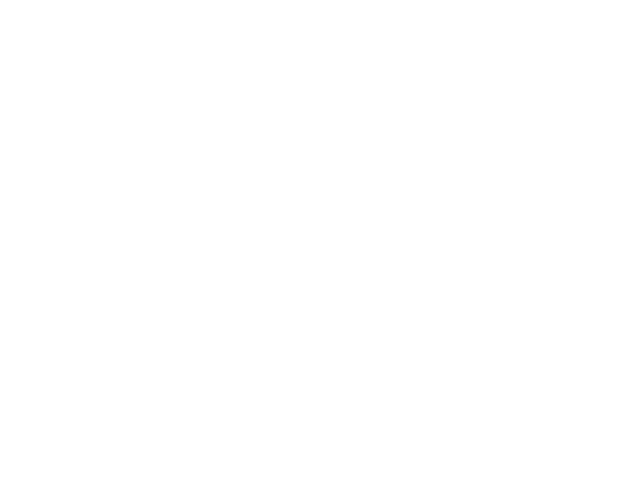

In [152]:
dpsize = np.ones((nkey,nangle,ncontrast-1,nsize,nsize))*np.nan
for k in range(nkey):
    if not Rcontrast[k] is None:
        for c in range(ncontrast-1):
            for i in range(nangle):
                for s1 in range(nsize):
                    for s2 in range(nsize):
                        dpsize[k,i,c,s1,s2] = dot_product(Rsize[k][s1,i,c],Rsize[k][s2,i,c])
plt.figure()
for c in range(ncontrast-1):
    plt.subplot(1,ncontrast-1,c+1)
    plt.imshow(np.nanmean(np.nanmean(dpsize[:,:,c],0),0),vmin=0,vmax=1)

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


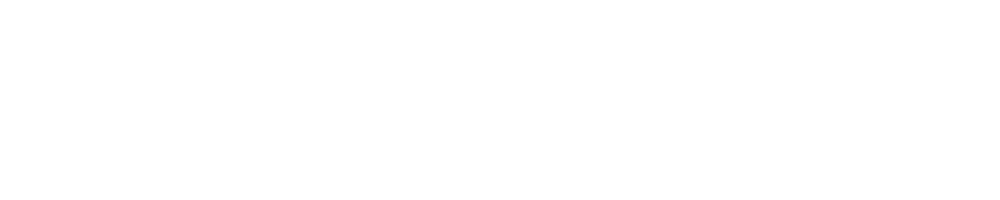

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


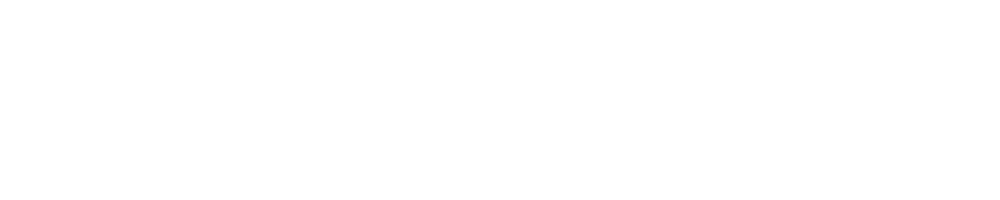

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


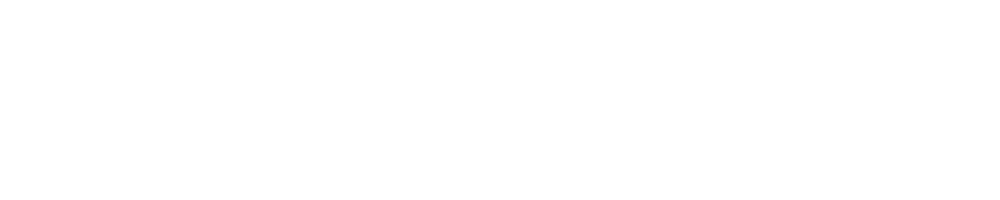

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


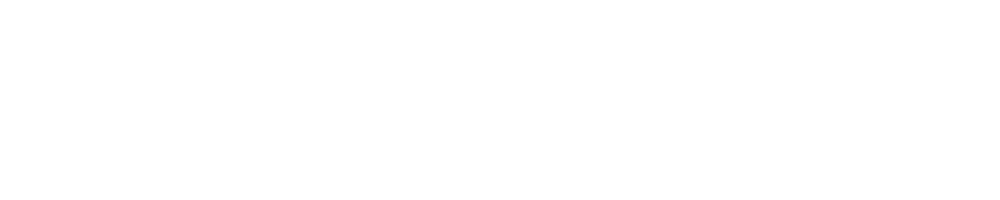

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


In [127]:
nkey = len(keylist)
Rori = [None]*nkey
for k in range(nkey): #range(len(keylist)):
    nangle = 8
    
    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<10,pval_ret<0.05)
    running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
    running = running_speed_cm_s>7
    if np.logical_and(ontarget_ret_lax.sum()>100,running.mean()>0.5):
        Rori[k] = np.zeros((5,8,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        all_or_nothing = contrast == contrast.max()

        plt.figure(figsize=(10,2))
        for s in range(5):
            plt.subplot(1,5,s+1)
            for i in range(nangle):
                lkat = np.logical_and(np.logical_and(np.logical_and(size==s,running),all_or_nothing),np.in1d(np.mod(angle-i,nangle),(6,0,2)))
                X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
        #         angle = ds[keylist[k]]['stimulus_id'][()][-1][lkat]
                uangle = np.unique(angle)
                y = np.zeros((len(angle[lkat]),))
                y = angle[lkat]==i
        #         y = np.logical_or(y[:,:4],y[:,4:])

                na = 50
                sc = np.zeros((na,))
                alphas = np.logspace(0,3,na)
                for ia,alpha in enumerate(alphas):
                    linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                    reg = linreg.fit(X,y)
                    scores = sklearn.model_selection.cross_validate(linreg,X,y)
                    pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                    sc[ia] = scores['test_score'].mean()
                best_alpha = np.argmax(sc)
                linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                reg = linreg.fit(X,y)

                Rori[k][s,i] = reg.coef_
                plt.plot(sc)
                plt.ylim(-1,1)

In [ ]:
for k in (2,): #range(len(keylist)):
    nangle = 8

    pval_ret = ds[keylist[k]]['rf_mapping_pval'][()]
    dist_ret = ds[keylist[k]]['rf_distance_deg'][()]
    ontarget_ret_lax = np.logical_and(dist_ret<40,pval_ret<0.05)
    if ontarget_ret_lax.sum()>100:
        R = np.zeros((5,8,ontarget_ret_lax.sum()))
        size = ds[keylist[k]]['stimulus_id'][()][0]
        contrast = ds[keylist[k]]['stimulus_id'][()][1]
        running_speed_cm_s = ds[keylist[k]]['running_speed_cm_s'][()]
        angle = ds[keylist[k]]['stimulus_id'][()][-1]
        all_or_nothing = np.logical_or(contrast==0,contrast>3)

        plt.figure(figsize=(10,2))
        for s in range(5):
            plt.subplot(1,5,s+1)
            for i in range(nangle):

                lkat = np.logical_and(np.logical_and(np.logical_and(angle==i,size==s),running_speed_cm_s>7),all_or_nothing)
                X = ds[keylist[k]]['decon'][()].T[lkat][:,ontarget_ret_lax]
        #         angle = ds[keylist[k]]['stimulus_id'][()][-1][lkat]
                uangle = np.unique(angle)
                y = np.zeros((len(angle[lkat]),))
                y = contrast[lkat]>0

                na = 50
                sc = np.zeros((na,))
                alphas = np.logspace(0,3,na)
                for ia,alpha in enumerate(alphas):
                    linreg = sklearn.linear_model.Ridge(alpha=alpha,normalize=True)
                    reg = linreg.fit(X,y)
                    scores = sklearn.model_selection.cross_validate(linreg,X,y)
                    pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
                    sc[ia] = scores['test_score'].mean()
                best_alpha = np.argmax(sc)
                linreg = sklearn.linear_model.Ridge(alpha=alphas[best_alpha],normalize=True)
                reg = linreg.fit(X,y)

                R[s,i] = reg.coef_
                plt.plot(sc)
                plt.ylim(-1,1)

<IPython.core.display.Javascript object>


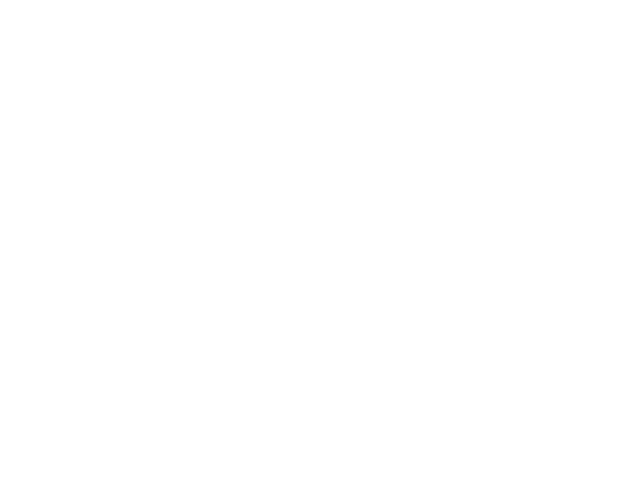

In [473]:
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(dp[i],vmin=0,vmax=1)
# plt.colorbar()

In [260]:
na = 40
sc = np.zeros((na,))
for ia,alpha in enumerate(np.linspace(8e-1,8e0,na)):
    linreg = sklearn.linear_model.Ridge(alpha=alpha)
    reg = linreg.fit(X,y)
    scores = sklearn.model_selection.cross_validate(linreg,X,y)
    pred = sklearn.model_selection.cross_val_predict(linreg,X,y)
    sc[ia] = scores['test_score'].mean()

<IPython.core.display.Javascript object>


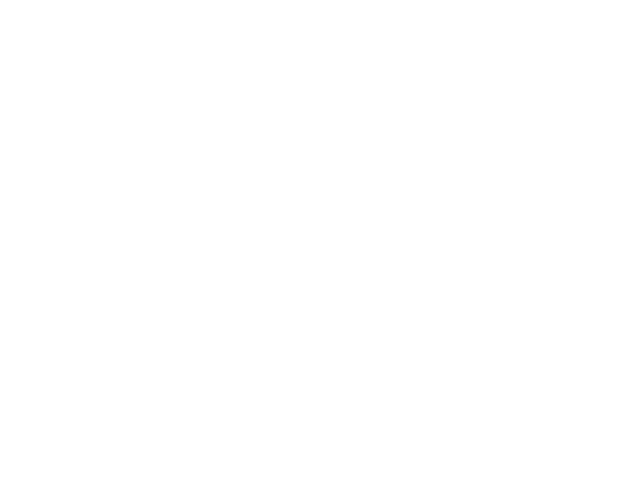

In [310]:
plt.figure()
plt.plot(sc)

<IPython.core.display.Javascript object>


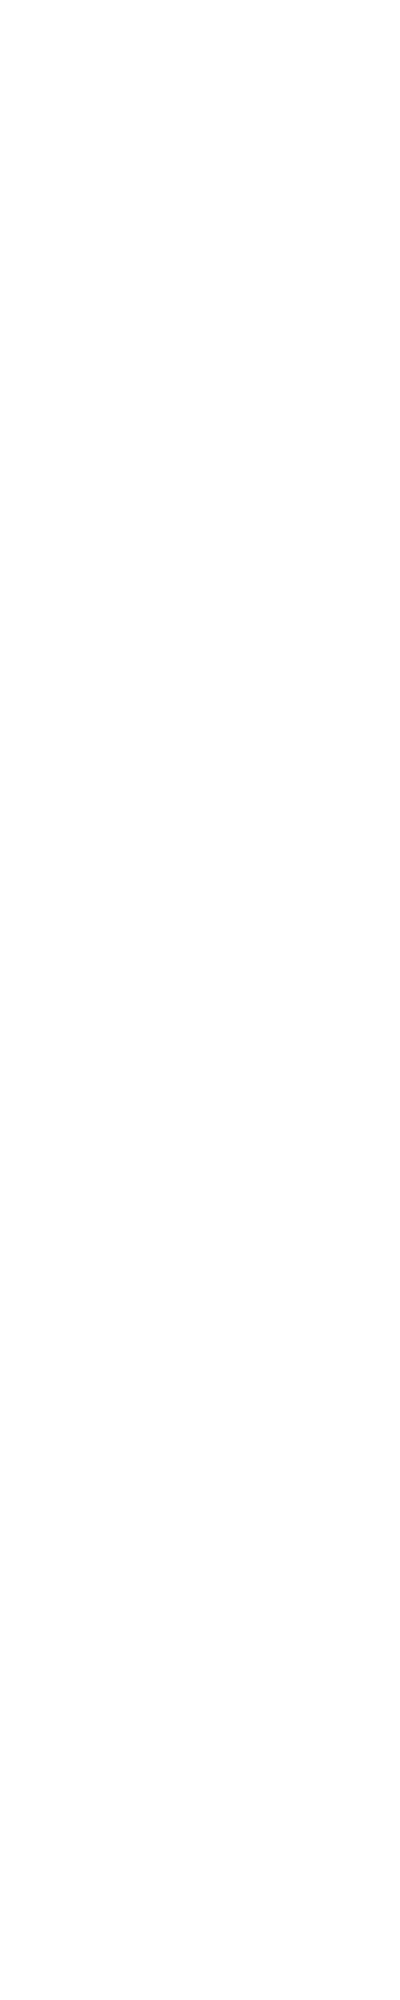

In [311]:
plt.figure(figsize=(4,20))
plt.subplot(1,2,1)
plt.imshow(y)
plt.subplot(1,2,2)
plt.imshow(pred)

<IPython.core.display.Javascript object>


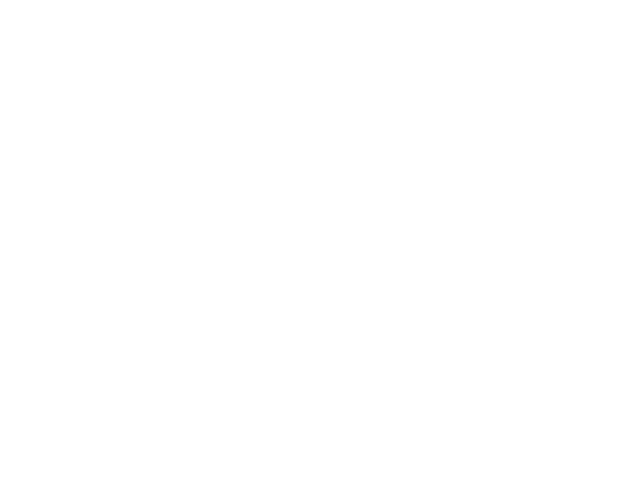

In [123]:
plt.figure()
sorta = np.argsort(reg.coef_[0])
for i in range(0,len(uangle)):
    plt.scatter(np.arange(X.shape[1]),reg.coef_[i][sorta],s=5,alpha=0.2)

<IPython.core.display.Javascript object>


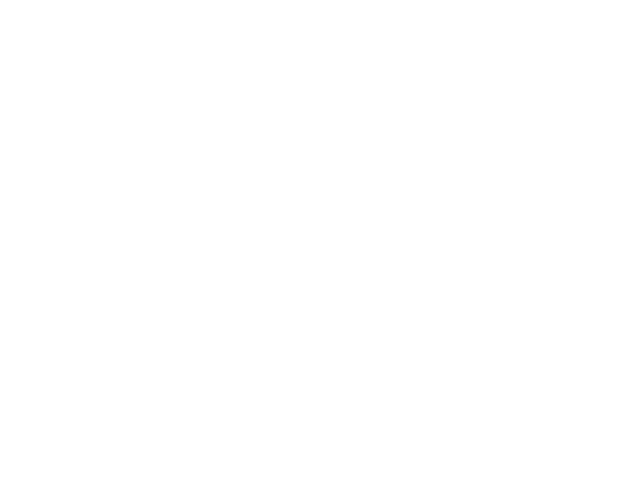

NameError: name 'regr' is not defined

In [125]:
plt.figure()
plt.plot((regr.coef_[0]*X.T).sum(0))